<a href="https://colab.research.google.com/github/wissemkarous/football-players-tracking/blob/main/train_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from numpy import argmax

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
x=np.zeros((183,96,96,3),dtype=np.float32)
ye=np.zeros((183,1),dtype=np.float32)

In [10]:
p=0
for filename in os.listdir('/content/drive/MyDrive/my drive/players'):
    for player in os.listdir('/content/drive/MyDrive/my drive/players'+'/'+filename):
        img=cv2.imread('/content/drive/MyDrive/my drive/players'+'/'+filename+'/'+player)
        x[p]=cv2.resize(img,(96,96))
        ye[p]=int(filename)
        p=p+1
y = to_categorical(ye)
print(y)   

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [11]:
x=x/255.0

In [12]:
from sklearn.utils import shuffle

In [13]:
v, u = shuffle(x, y)

In [14]:
inputs=keras.layers.Input((96,96,3))
l1=keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu')(inputs)
l2=keras.layers.MaxPool2D((2,2))(l1)


l3=keras.layers.Conv2D(16,(3,3),activation='relu')(l2)
l4=keras.layers.MaxPool2D((2,2))(l3)

l5=keras.layers.Conv2D(8,(3,3),activation='relu')(l4)
l6=keras.layers.MaxPool2D((2,2))(l5)

l7=keras.layers.Conv2D(2,(3,3),activation='relu')(l6)


l8=keras.layers.Flatten()(l7)
l9=keras.layers.Dense(256,activation='relu')(l8)
l10=keras.layers.Dropout(0.5)(l9)
l11=keras.layers.Dense(3,activation='sigmoid')(l10)
model=keras.Model(inputs=inputs,outputs=l11)

In [15]:
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [16]:
model.fit(v,u,6,500)

Epoch 1/500
31/31 [==============================] - 4s 86ms/step - loss: 0.6775 - accuracy: 0.3934
Epoch 2/500
31/31 [==============================] - 3s 97ms/step - loss: 0.6530 - accuracy: 0.4098
Epoch 3/500
31/31 [==============================] - 2s 57ms/step - loss: 0.6359 - accuracy: 0.4426
Epoch 4/500
31/31 [==============================] - 2s 59ms/step - loss: 0.6271 - accuracy: 0.4426
Epoch 5/500
31/31 [==============================] - 2s 57ms/step - loss: 0.6234 - accuracy: 0.3989
Epoch 6/500
31/31 [==============================] - 2s 57ms/step - loss: 0.6210 - accuracy: 0.3607
Epoch 7/500
31/31 [==============================] - 2s 57ms/step - loss: 0.6200 - accuracy: 0.4044
Epoch 8/500
31/31 [==============================] - 2s 80ms/step - loss: 0.6199 - accuracy: 0.3880
Epoch 9/500
31/31 [==============================] - 3s 100ms/step - loss: 0.6177 - accuracy: 0.3770
Epoch 10/500
31/31 [==============================] - 2s 66ms/step - loss: 0.6181 - accuracy: 0.366

1/1 [==============================] - 0s 131ms/step
1
1


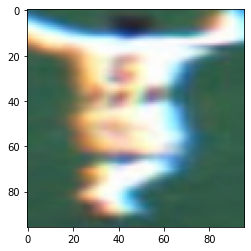

In [17]:
o=110
yu=model.predict(np.reshape(v[o],(1,96,96,3)))
plt.imshow(v[o])
print(argmax(yu))
print(argmax(u[o]))

In [18]:
model.save('model2.h5')